In [10]:
%pylab inline
import magproc.magdata
import magproc.pipeline
import os

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
d = magproc.magdata.MagData.load("../2025-07-14 mag_qc_dev/data/full_test_data.fixed.csv")

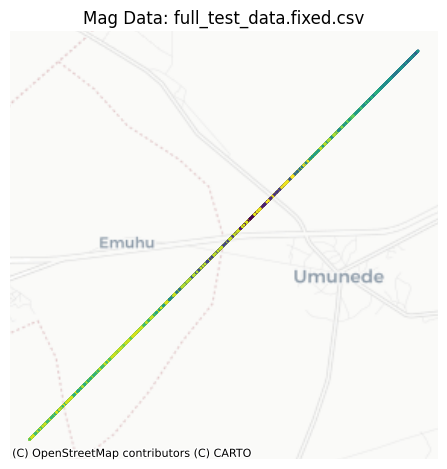

<Axes: title={'center': 'Mag Data: full_test_data.fixed.csv'}>

In [3]:
d.plot_map(markersize=1, zoom=12, column="MAGCOM")

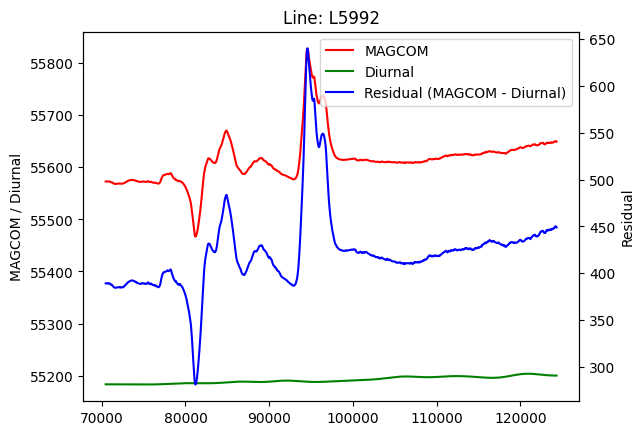

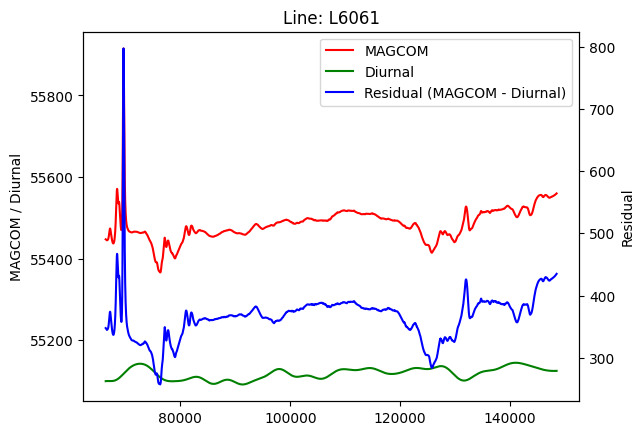

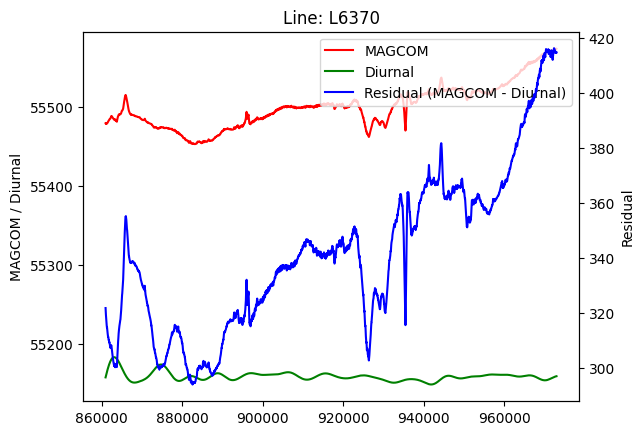

In [4]:
d.plot()

In [5]:
d.save("foo.mag.zip")

In [13]:
p = magproc.pipeline.MagPipeline.parse("""
steps:
 - set_meta:
     crs: 32604
     diurnal:
       lat: 62.9588417 
       lon: -155.599325 
 - set_constants
 - diurnal_qc_for_15s_chord
 - diurnal_qc_for_60s_chord
 - drape_and_speed_qc
 - noice_qc:
     MAG_4th_diff_OOS_threshold: 0.05
 - write_noise_summary
 - write_diurnal_summary
 - write_drape_summary
""", out_path="../testout")


In [14]:
os.makedirs(p.pipeline["out_path"], exist_ok=True)
dp = p.run(d)

Running step 0: set_meta with crs=32604, diurnal={'lat': 62.9588417, 'lon': -155.599325}
Running step 1: set_constants
Running step 2: diurnal_qc_for_15s_chord
Running step 3: diurnal_qc_for_60s_chord
Running step 4: drape_and_speed_qc
Running step 5: noice_qc with MAG_4th_diff_OOS_threshold=0.05
Running step 6: write_noise_summary
Running step 7: write_diurnal_summary
Running step 8: write_drape_summary


/home/redhog/Projects/AGF-GeoPhysics/OM_DGGS_python_extensions/magproc/magfilters.py:414: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  drape_summary = pd.concat([drape_summary, OOS_drape], ignore_index=True) # add OOS drape segments to summary dataframe


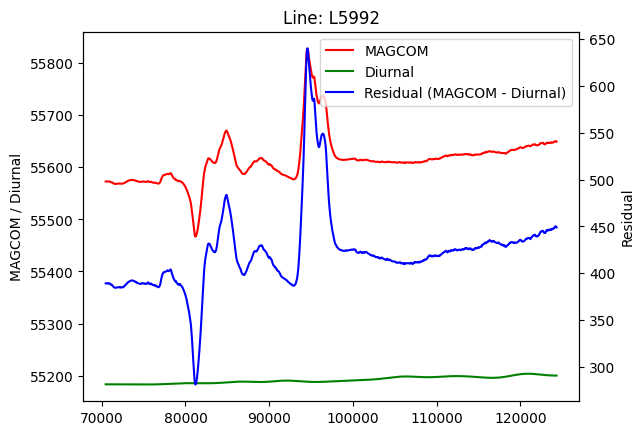

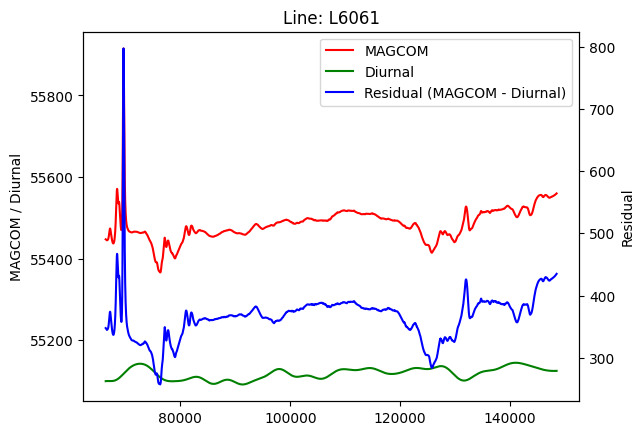

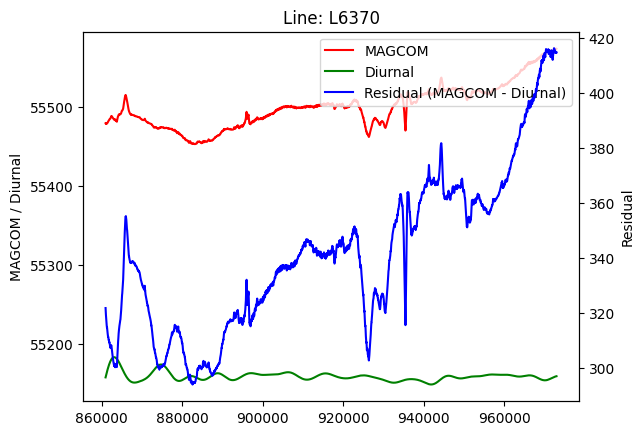

In [15]:
dp.plot()